# Wstęp




Klasyfikacja jest to jedno z podstawowych zadań uczenia maszynowego, polegające na przypisaniu danych wejściowych do odpowiedniej, ustalonej przez nas kategorii/klasy. W celu dokonania klasyfikacji, budowany oraz uczony jest specjalny model uczenia maszynowego. Modele te imitują biologiczne neurony. Posiadając odpowiednią ilość danych opisujących pewne atrybuty obiektu, można taki model nauczyć odpowiedniej kalsyfikacji danych.

Jednym z najprostszych modeli sztucznego neuronu jest Perceptron, którego zadaniem jest odpowiednia klasyfkiacja danych, przy pomocy znalezienia liniowej granicy decyzyjnej między zdefiniowanymi klasami. Perceptron składa się z jednej warstwy neuronów, gdzie każdy neuron jest połączony z każdym atrybutem wejściowym. Neurony obliczają ważoną sumę wejść i przekazują wynik przez funkcję aktywacji.

Celem wykonania poniższych zadań jest zaznajomienie się z modelem Perceptronu oraz z podstawowymi pojęciami takimi jak: klasyfikacja danych, ocena wydajności wytrenowanego modelu za pomocą macierzy pomyłek oraz przeprowadzenie eksperymantów, które na celu mają sprawdzenie wpływu różnych parametrów, takich jak podział na zbiór uczący i testowy czy liczba epok, na wydajność klasyfikacji perceptronu.


Import potrzebnych bibliotek

In [19]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ZAD 1

## Kod


Treść zadania:

Proszę wygenerować po 400 2-wymiarowych punktów przypisanych do dwóch klas K1 i K2, pochodzących z rozkładów normalnych N([0,-1],1) i N([1,1],1) i podzielić je losowo na zbiory uczące i testujące w proporcji N do 400-N. Proszę sprawdzić średnią dokładność klasyfikacji i podać odchylenie standardowe dla N = 2, 5, 10, 20, 100, powtarzając eksperyment 10 razy dla każdego N. Dla każdego N dla jednej z powtórek proszę ustalić wzór hiperpłaszczyzny (w naszym wypadku - prostej) oddzielającej klasy, a następnie pokazać ją na wykresie razem z danymi (w sumie 5 wykresów).


Poniższy kod ma zaadanie stworzenie dwóch zbiorów: jednego opisującego 400 2-wymiarowych punktów pochodzących z odpowiednich rozkłądów normalnych N([0,-1],1) i N([1,1],1) oraz drugiego zbioru który opisuje przynależność każdego z punktów do odpowiedniej klasy. Na standardowe wyjście wypisane zostały przykładowo wygenerowane dane.

In [20]:
X1 = np.concatenate((np.random.normal([0,-1],[1,1],[200,2]), np.random.normal([1,1],[1,1],[200,2])))
Y1 = np.concatenate((np.array([0]*200), np.array([1]*200)))
print(X1[:10])
print(X1[200:210])
print(Y1[:10])
print(Y1[200:210])

[[-7.95977895e-02  5.55080861e-01]
 [-7.86287490e-04  7.03732618e-01]
 [-5.93673695e-01 -1.44590795e+00]
 [ 9.00372274e-01 -6.21701440e-01]
 [ 5.85622506e-01 -1.15249364e+00]
 [-5.08532667e-01 -1.04672931e+00]
 [ 8.20547763e-01 -1.17469548e+00]
 [ 1.45480694e-01 -1.52575561e+00]
 [ 4.53750278e-01 -1.51480106e+00]
 [-2.40391429e-01  1.24340649e+00]]
[[-0.73408629  0.0226165 ]
 [ 1.15748653  1.06487682]
 [-1.09741873  0.645934  ]
 [ 1.06896961  1.68752043]
 [ 1.01712859  1.69658293]
 [ 1.20208817  0.78585791]
 [ 1.05212495 -0.39857822]
 [ 0.47493516  1.78138663]
 [ 1.18840354  2.93989668]
 [ 1.11995632  1.46942751]]
[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]


W kolejnym kroku tworzymy zmienną perceptron_layer która odpowiadać będzie za nasz model Perceptronu. Następnie, nasz wcześniej stworzony zbiór danych dzielimy na zbiór odpowiadający za trenowanie modelu oraz na zbiór zajmujący sie testowaniem modelu, w proporcjach N do 400-N, dla różnych N (2,5,10,20,100). Dla każdego N upewniamy się na początku, że w zbiorze klas treningowych, znajdują się conajmniej 2 różne klasy (co potrzebne jest do prawidłowego działania uczenia modelu). W następnej kolejności, dla każdego N trenujemy model 10 razy, oraz zapisujemy otrzymaną trafność modelu do tablicy accuracies. Po dokonaniu 10 uczeń modelu, na ekran wypisana zosataje średnia oraz odchylenie standardowe otrzymanych trafności wytrenowanego modelu. Ostatecznie dla każdego N, ostatni wytrenowany model zostaje przedstawiony na wykresie w postaci wybranych wcześniej przez nas punktów oraz prostej prezentującej podział na klasy.

N = 2	acc = 1.0	odch = 0.0


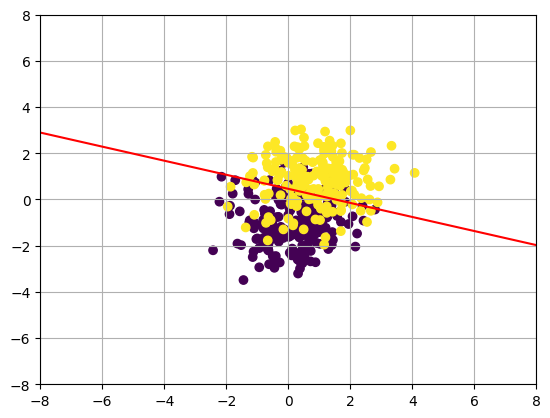

N = 5	acc = 0.8	odch = 0.0


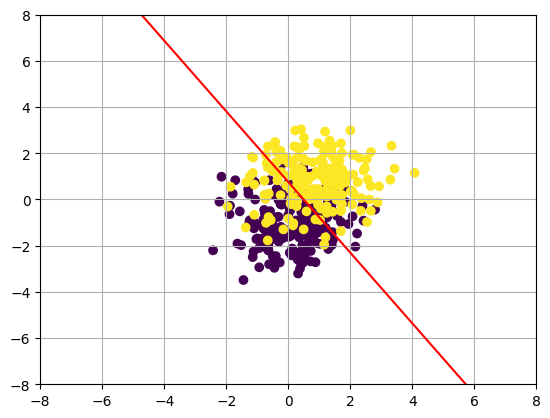

N = 10	acc = 1.0	odch = 0.0


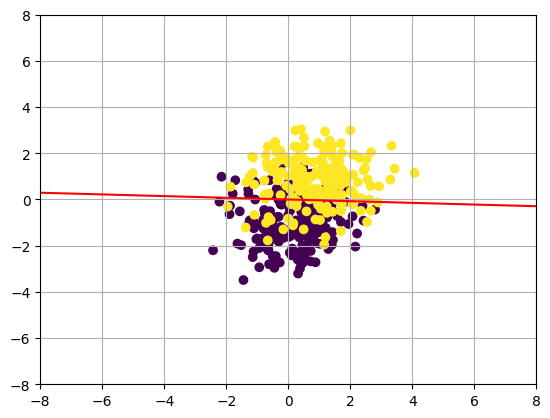

N = 20	acc = 0.8	odch = 0.0


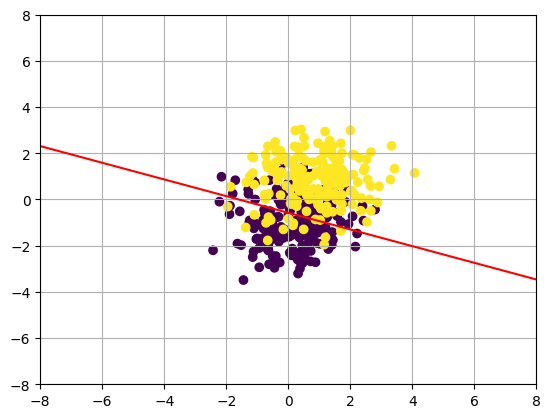

N = 100	acc = 0.78	odch = 0.0


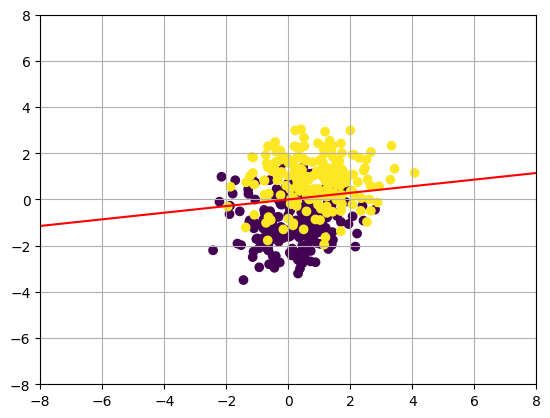

In [21]:
N = [2,5,10,20,100]
perceptron_layer = Perceptron(tol=1e-3, max_iter = 20)

for i in N:
  accuracies = []
  Y_train = [0, 0]
  while Y_train[0] == Y_train[1]:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=400-i)
  for j in range(10):
    perceptron_layer.fit(X_train, Y_train)
    acc = perceptron_layer.score(X_train, Y_train)
    accuracies.append(acc)
  print("N = " + str(i) + "\tacc = " + str(np.mean(accuracies)) + "\todch = " + str(np.std(accuracies)))
  X_linespace = np.linspace(-8,8,200)
  line_X = -(1./perceptron_layer.coef_[0][1])*(perceptron_layer.coef_[0][0]*X_linespace+perceptron_layer.intercept_[0])
  plt.plot(X_linespace, line_X, '-r')
  plt.xlim(-8,8)
  plt.ylim(-8,8)
  plt.scatter(X1[:,0], X1[:,1], c=Y1)
  plt.grid()
  plt.show()


## Wnioski

Dokładność klasyfikacji perceptronu zależy od liczby próbek treningowych. Wraz z zwiększaniem liczby próbek treningowych dokładność klasyfikacji również wzrasta. Dla bardzo małej ilość danych treningowych model wskazuje accuracy na poziomie 100%, z czego można wyciągnąć wniosek że modele dla bardzo małej ilości danych treningowych mimo wysokiego accuracy, nie będą działały dobrze, co widać na wykresie przedstawiającym prostą oddzielającą odpowiednie kategorie. Granica decyzyjna perceptronu na wykresie oddziela dwie klasy danych, ale jej dokładność zależy od ilości dostępnych danych treningowych. Dla mniejszej liczby danych treningowych granica decyzyjna może być mniej dokładna. Ogólnie rzecz biorąc, program ten ilustruje, jak ważna jest liczba dostępnych danych treningowych dla wydajności algorytmu uczenia maszynowego, w tym przypadku perceptronu. Zwiększanie liczby próbek treningowych może prowadzić do poprawy dokładności klasyfikacji, ale należy również wziąć pod uwagę wariancję wyników w zależności od konkretnego podziału danych.

# ZAD 2

## Kod

Treść zadania:

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris( ). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Jaką największą trafność jest w stanie uzyskać pojedyncza warstwa perceptronów w tym zadaniu? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności).

Na początku w celu wykonania zadania ładujemy dataset opisujący irysy. W kolejnym kroku po 10 razy wykonujemy następujące operację: Dzielimy zbiór danych na odpowiednio dane trenujące i testowe, w proporcji 80% do 20%, trenujemy model oraz wypisujemy macierz pomyłek, na której podstawie wyliczmy dokładność działania wytrenowanego modelu.

In [6]:
data_iris = load_iris()

In [11]:
perceptron_layer = Perceptron(tol=1e-3, max_iter = 20, early_stopping=True)

for i in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(data_iris['data'], data_iris['target'], test_size=0.2)
  perceptron_layer.fit(X_train, Y_train)
  Y_predicted = perceptron_layer.predict(X_test)
  confusion_matrix_model = confusion_matrix(Y_test, Y_predicted)
  print("i: " + str(i))
  print(confusion_matrix_model)
  accuracy = ((confusion_matrix_model[0,0] + confusion_matrix_model[1,1] + confusion_matrix_model[2,2]) / np.sum(confusion_matrix_model))
  print(accuracy)
  print()

i: 0
[[11  0  0]
 [ 0 13  0]
 [ 0  6  0]]
0.8

i: 1
[[11  0  0]
 [ 5  0  4]
 [ 0  0 10]]
0.7

i: 2
[[14  0  0]
 [ 3  7  0]
 [ 0  6  0]]
0.7

i: 3
[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]
0.9666666666666667

i: 4
[[ 0 11  0]
 [ 0 12  0]
 [ 0  7  0]]
0.4

i: 5
[[11  0  0]
 [ 5  0  6]
 [ 0  0  8]]
0.6333333333333333

i: 6
[[ 8  0  0]
 [ 6  0  4]
 [ 0  0 12]]
0.6666666666666666

i: 7
[[11  0  0]
 [10  0  0]
 [ 1  0  8]]
0.6333333333333333

i: 8
[[12  0  0]
 [ 0 10  0]
 [ 0  1  7]]
0.9666666666666667

i: 9
[[ 0 11  0]
 [ 0  7  0]
 [ 0 12  0]]
0.23333333333333334



## Wnioski

Zauważmy, że perceptron to model liniowy. Oznacza to, że próbuje znaleźć liniowe separatory między klasami w danych. Jeśli dane nie są liniowo separowalne, to znaczy, że nie można oddzielić klas za pomocą jednej prostej linii, co może prowadzić do niskiej trafności klasyfikacji.
W przypadku zestawu danych iris możemy spodziewać się, że pewne kombinacje cech irysów będą liniowo separowalne (na przykład jedna para cech może być liniowo separowalna od innych), ale inne mogą nie być. Analizując macierze pomyłek zauważamy że najwyższa trafność jaką otrzymaliśmy jest to 96%, jednakże zdecydowana większość modeli wytrenowała trafność na o wiele niższym poziomie. Wynikać to może z faktu że niektóre cechy w zestawie danych irys mogą nie być liniowo separowalne, przez co model perceptronu może nie spełniać swojego zadania.

# ZAD 3

## Kod

Treść zadania:

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

Zbiór danych rysów dzielimy na zbiór uczący i testujący na 4 różne sposoby w proporcjach: 90% do 10%, 70% do 30%, 50% do 50% oraz 20% do 80%. Nastepnie model zostaje wytrenowany danymi, wypisywana zostaje macierz pomyłek, oraz obliczona zostaje trafność modelu.

In [15]:
perceptron_layer = Perceptron(tol=1e-4, max_iter = 20, early_stopping=True)
test_size_arr = [0.1, 0.3, 0.5, 0.8]

for i in test_size_arr:
  X_train, X_test, Y_train, Y_test = train_test_split(data_iris['data'], data_iris['target'], test_size=i)
  perceptron_layer.fit(X_train, Y_train)
  Y_predicted = perceptron_layer.predict(X_test)
  confusion_matrix_model = confusion_matrix(Y_test, Y_predicted)
  accuracy = ((confusion_matrix_model[0,0] + confusion_matrix_model[1,1] + confusion_matrix_model[2,2]) / np.sum(confusion_matrix_model))
  print(confusion_matrix_model)
  print(accuracy)
  print()


[[6 0 0]
 [3 0 0]
 [0 0 6]]
0.8

[[15  0  0]
 [ 0 14  2]
 [ 0  4 10]]
0.8666666666666667

[[28  0  0]
 [20  0  3]
 [ 0  0 24]]
0.6933333333333334

[[39  0  0]
 [ 6  0 36]
 [ 0  0 39]]
0.65



## Wnioski

Spoglądając na wyniki, można zauważyć że im większy jest zbiór trenujący model, tym dokładniejszy będzie wynik poprawności jego działania. Jednakże im więcej będziemy mieli danych testowych, tym dokładniej będzie można odczytać accuracy modelu, wyliczając je z macierzy pomyłek.

# ZAD 4

## Kod

Treść zadania:

Proszę sprawdzić, jak ilość epok wpływa na dokładność klasyfikacji zbioru irysów. Proszę przedstawić wnioski oraz wykres trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

W poniższym kodzie trenujemy model uczenia maszynowego dla różnej ilości epok. Dla każdej ilości epok tworzymy model uczenia maszynowego, dzielimy zbiór danych na trenujący i testujący, następnie trenujemy model, oraz zapisujemy wartość trafności danego modelu w liście. Ostatecznie rysujemy wykres trafności klasyfikacji w zależności ood liczby epok.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


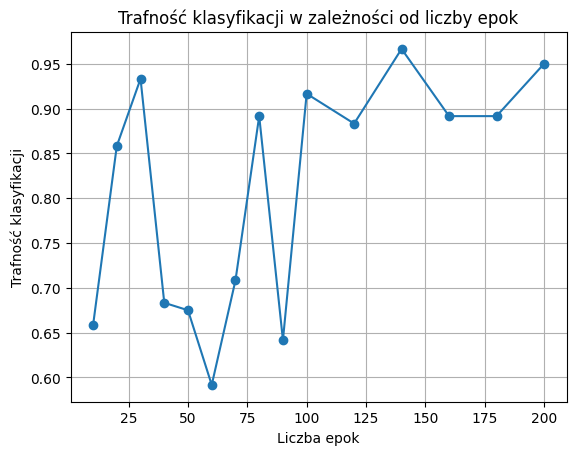

In [26]:
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
accuracies = []

for i in epochs:
  perceptron_layer = Perceptron(tol=1e-4, max_iter = i, early_stopping = False)
  X_train, X_test, Y_train, Y_test = train_test_split(data_iris['data'], data_iris['target'], test_size=0.2)
  perceptron_layer.fit(X_train, Y_train)
  accuracy = perceptron_layer.score(X_train, Y_train)
  accuracies.append(accuracy)

plt.plot(epochs, accuracies, marker='o')
plt.title('Trafność klasyfikacji w zależności od liczby epok')
plt.xlabel('Liczba epok')
plt.ylabel('Trafność klasyfikacji')
plt.grid(True)
plt.show()

## Wnioski

W miarę zwiększania liczby epok, trafność klasyfikacji na zbiorze testowym może się poprawiać, ale może również osiągnąć pewien pułap, po którym dalsze zwiększanie liczby epok nie przynosi znaczącej poprawy. Zbyt mała liczba epok może prowadzić do niedouczenia modelu, podczas gdy zbyt duża liczba epok może prowadzić do przetrenowania, co oznacza, że model dostosowuje się zbyt dobrze do danych uczących, co może prowadzić do słabszej generalizacji na danych testowych.